# FBI Uniform Crime Reporting Analysis | 2012

*Author: Archit Singh | Rishabh Madani*


## Table of Contents

1. Importing libraries
2. Importing dataset    
2. Basic Text Data Pre-processing & Cleaning Text Data
4. Preparing Data for Exploratory Data Analysis (EDA)
5. Exploratory Data Analysis
6. Feature Selection
7. Data modelling
8. Conclusion
9. Reference


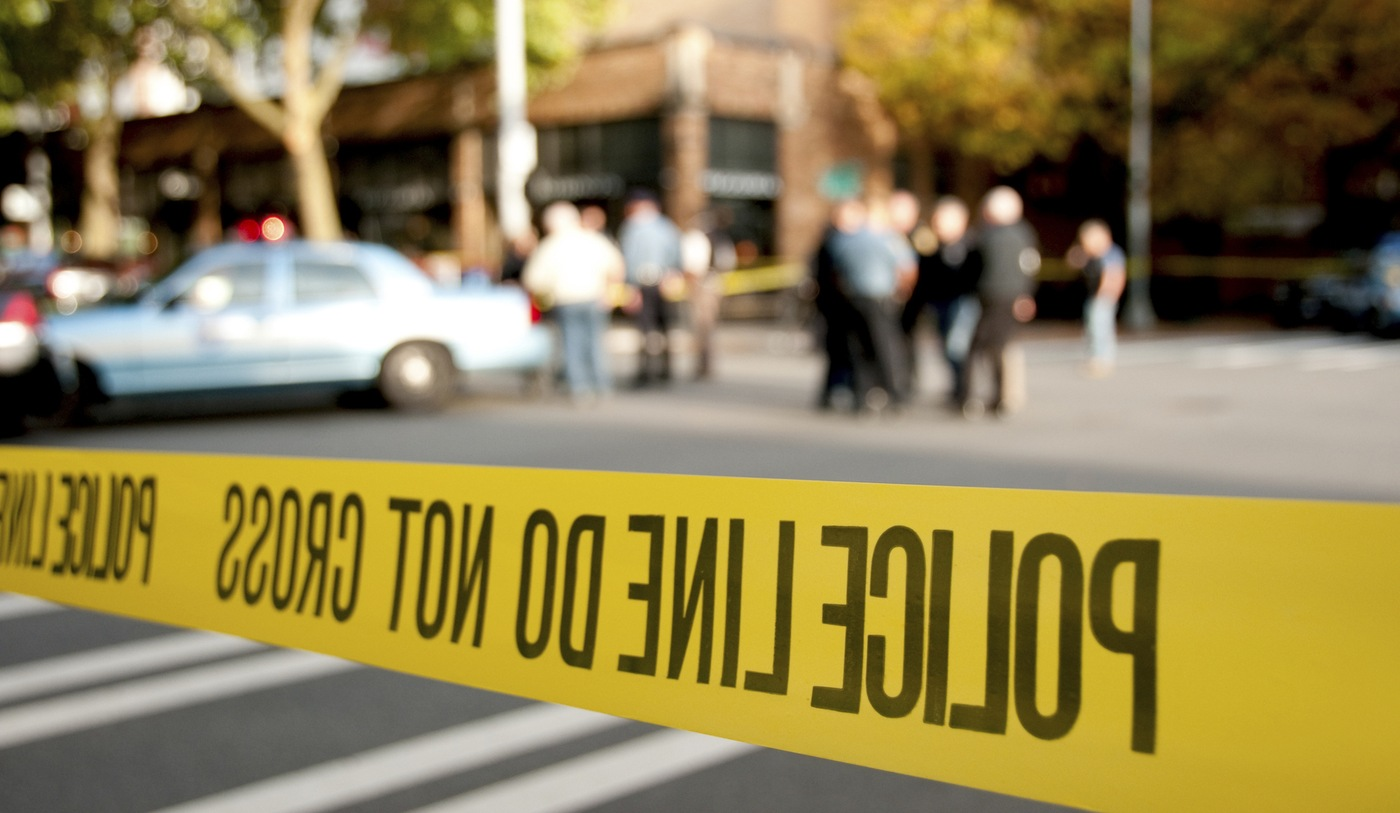

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **2- Importing libraries**
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import plotly.express as px

># **3- Importing dataset**
---

In [2]:
file='../Dataset/U.S._Offense_Type_by_Agency_2012.xlsx'
try:
    df = pd.read_excel(file, skiprows=3, skipfooter=4,
                        header=[1], index_col=[0,1,2,3])
except Exception as e:
    print(f"Error loading file: {e}")

df.head()

Assault\nOffenses   
State    Agency Type           Agency Name     Population1                      
ALABAMA  Cities                Hoover          82332                    870.0  \
ARIZONA  Cities                Apache Junction 36986                    559.0   
                               Gilbert         214264                  1242.0   
         Metropolitan Counties Yuma2           214264                   555.0   
ARKANSAS Cities                Alma            5439                     197.0   

                                                            Aggravated\nAssault   
State    Agency Type           Agency Name     Population1                        
ALABAMA  Cities                Hoover          82332                       25.0  \
ARIZONA  Cities                Apache Junction 36986                       96.0   
                               Gilbert         214264                     123.0   
         Metropolitan Counties Yuma2           214264                      94.0   
ARKANSAS Cities                Alma            5439                        11.0   

                                                            Simple\nAssault   
State    Agency Type           Agency Name     Population1                    
ALABAMA  Cities                Hoover          82332                  594.0  \
ARIZONA  Cities                Apache Junction 36986                  381.0   
                               Gilbert         214264                 892.0   
         Metropolitan Counties Yuma2           214264                 376.0   
ARKANSAS Cities                Alma            5439                   108.0   

                                                            Intimidation   
State    Agency Type           Agency Name     Population1                 
ALABAMA  Cities                Hoover          82332               251.0  \
ARIZONA  Cities                Apache Junction 36986                82.0   
                               Gilbert         214264              227.0   
         Metropolitan Counties Yuma2           214264               85.0   
ARKANSAS Cities                Alma            5439                 78.0   

                                                            Homicide\nOffenses   
State    Agency Type           Agency Name     Population1                       
ALABAMA  Cities                Hoover          82332                       2.0  \
ARIZONA  Cities                Apache Junction 36986                       1.0   
                               Gilbert         214264                      5.0   
         Metropolitan Counties Yuma2           214264                     26.0   
ARKANSAS Cities                Alma            5439                        NaN   

                                                            Murder and Nonnegligent Manslaughter   
State    Agency Type           Agency Name     Population1                                         
ALABAMA  Cities                Hoover          82332                                         2.0  \
ARIZONA  Cities                Apache Junction 36986                                         1.0   
                               Gilbert         214264                                        5.0   
         Metropolitan Counties Yuma2           214264                                       26.0   
ARKANSAS Cities                Alma            5439                                          NaN   

                                                            Negligent\nManslaughter   
State    Agency Type           Agency Name     Population1                            
ALABAMA  Cities                Hoover          82332                            NaN  \
ARIZONA  Cities                Apache Junction 36986                            NaN   
                               Gilbert         214264                           NaN   
         Metropolitan Counties Yuma2           214264                           NaN   
ARKANSAS Cities          

In [3]:
df.columns = df.columns.str.replace(r'\n', ' ')
df_2=df.reset_index()
df_2.head()

,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


> # **4- Basic Text Data Pre-processing**
---

In [4]:
df_2.columns = df_2.columns.str.replace('\n', ' ', regex=True)
df_2.columns = df_2.columns.str.replace('^1$', ' ', regex=True)

> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State                                        5235 non-null   object 
 1   Agency Type                                  5235 non-null   object 
 2   Agency Name                                  5235 non-null   object 
 3   Population1                                  5235 non-null   int64  
 4   Assault Offenses                             4773 non-null   float64
 5   Aggravated Assault                           4079 non-null   float64
 6   Simple Assault                               4647 non-null   float64
 7   Intimidation                                 3971 non-null   float64
 8   Homicide Offenses                            937 non-null    float64
 9   Murder and Nonnegligent Manslaughter         855 non-null    float64
 10  

In [6]:
df_2.shape

(5235, 59)

In [7]:
missing_percentage = df_2.isnull().mean() * 100
print(missing_percentage)

State                                           0.000000
Agency Type                                     0.000000
Agency Name                                     0.000000
Population1                                     0.000000
Assault Offenses                                8.825215
Aggravated Assault                             22.082139
Simple Assault                                 11.232092
Intimidation                                   24.145177
Homicide Offenses                              82.101242
Murder and Nonnegligent Manslaughter           83.667622
Negligent Manslaughter                         97.153773
Justifiable Homicide                           98.490926
Kidnapping/ Abduction                          61.719198
Sex Offenses                                   30.410697
Rape                                           45.692455
Sodomy                                         70.983763
Sexual Assault With An Object                  84.049666
Fondling                       

In [8]:
df_2.fillna(0, inplace=True)

In [9]:
for col in df_2.select_dtypes(include=['object']).columns:
    df_2[col] = df_2[col].str.upper().str.strip()

In [10]:
df_2.head()

,State,Agency Type,Agency Name,Population1,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations
0,ALABAMA,CITIES,HOOVER,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0
1,ARIZONA,CITIES,APACHE JUNCTION,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
2,ARIZONA,CITIES,GILBERT,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
3,ARIZONA,METROPOLITAN COUNTIES,YUMA2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,CITIES,ALMA,5439,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


> # **6- Exploratory data analysis**

### Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

In [29]:
t5s = df_2.iloc[:,0:8]
t5s = t5s[t5s["Agency Type"] != "Cities"]

q1 = t5s.groupby('State').agg({
    'Assault Offenses': 'sum',
    'Aggravated Assault': 'sum',
    'Simple Assault': 'sum',
    'Intimidation': 'sum'
}).reset_index()

In [30]:
top_5_states = q1.sort_values(by='Assault Offenses', ascending=False)[0:5]
top_5_states

,State,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation
27,TENNESSEE,147516.0,29356.0,87901.0,30259.0
14,MICHIGAN,129651.0,26003.0,79731.0,23917.0
31,VIRGINIA,103866.0,8941.0,83794.0,11131.0
21,OHIO,97495.0,7808.0,49926.0,39761.0
25,SOUTH CAROLINA,91139.0,17412.0,58947.0,14780.0


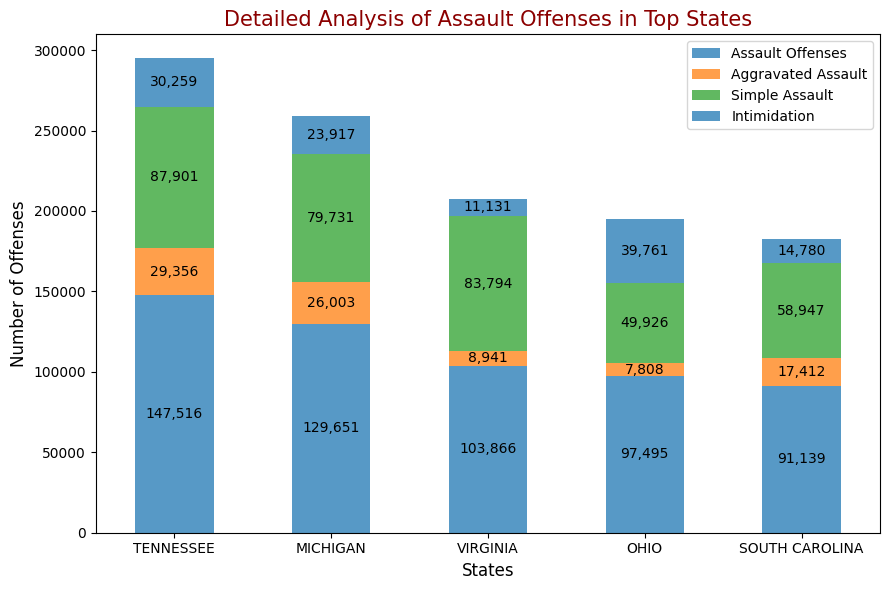

In [31]:
top_5_states.set_index('State', inplace=True)

# Plotting the stacked bar chart
ax = top_5_states.plot(kind='bar', stacked=True, figsize=(9, 6), alpha=0.75, rot=0, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding a title
plt.title('Detailed Analysis of Assault Offenses in Top States', fontsize=15, color='darkred')

# Labeling axes
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Offenses', fontsize=12)

# Adding data labels
for rect in ax.patches:
    height = rect.get_height()
    y = rect.get_y()
    if height > 0:
        ax.text(rect.get_x() + rect.get_width() / 2, y + height / 2, f'{int(height):,}', ha='center', va='center', fontsize=10, color='black', rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

We understood from the above chart that Tennessee leads with the highest overall count of assault offenses, particularly in Simple Assault cases. Michigan has a significant number of Intimidation offenses, whereas Ohio, Virginia, and South Carolina show fewer incidents. Simple Assault is consistently the most common offense across these states.

### Which category of crimes were most registered in universities?

In [32]:
crime_stats_uni = df_2[df_2["Agency Type"] == "UNIVERSITIES AND COLLEGES"]

In [33]:
crime_categories_cols = [
    'Assault Offenses', 'Homicide Offenses', 'Kidnapping/ Abduction', 'Sex Offenses',
    'Sex Offenses, Nonforcible', 'Arson', 'Bribery', 'Burglary/ Breaking & Entering',
    'Counter- feiting/ Forgery', 'Destruction/ Damage/ Vandalism', 'Embezzle- ment',
    'Extortion/ Blackmail', 'Fraud Offenses', 'Larceny- Theft Offenses',
    'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ',
    'Drug/ Narcotic Offenses', 'Gambling Offenses', 'Porno- graphy/ Obscene Material',
    'Prost- itution Offenses', 'Weapon Law Violations'
]

crime_counts = crime_stats_uni[crime_categories_cols].sum().sort_values(ascending=False)
most_frequent_crime = crime_counts.idxmax()
most_frequent_crime_value = crime_counts.max()

print(f"The most registered crime category in universities/colleges is '{most_frequent_crime}' with {most_frequent_crime_value} incidents.")

The most registered crime category in universities/colleges is 'Larceny- Theft Offenses' with 20630.0 incidents.


In [34]:
crime_counts_df = crime_counts.reset_index()
crime_counts_df.columns = ['Crime Category', 'Incidents']

crime_counts_df = crime_counts_df[:-1]
crime_counts_df.columns

Index(['Crime Category', 'Incidents'], dtype='object')

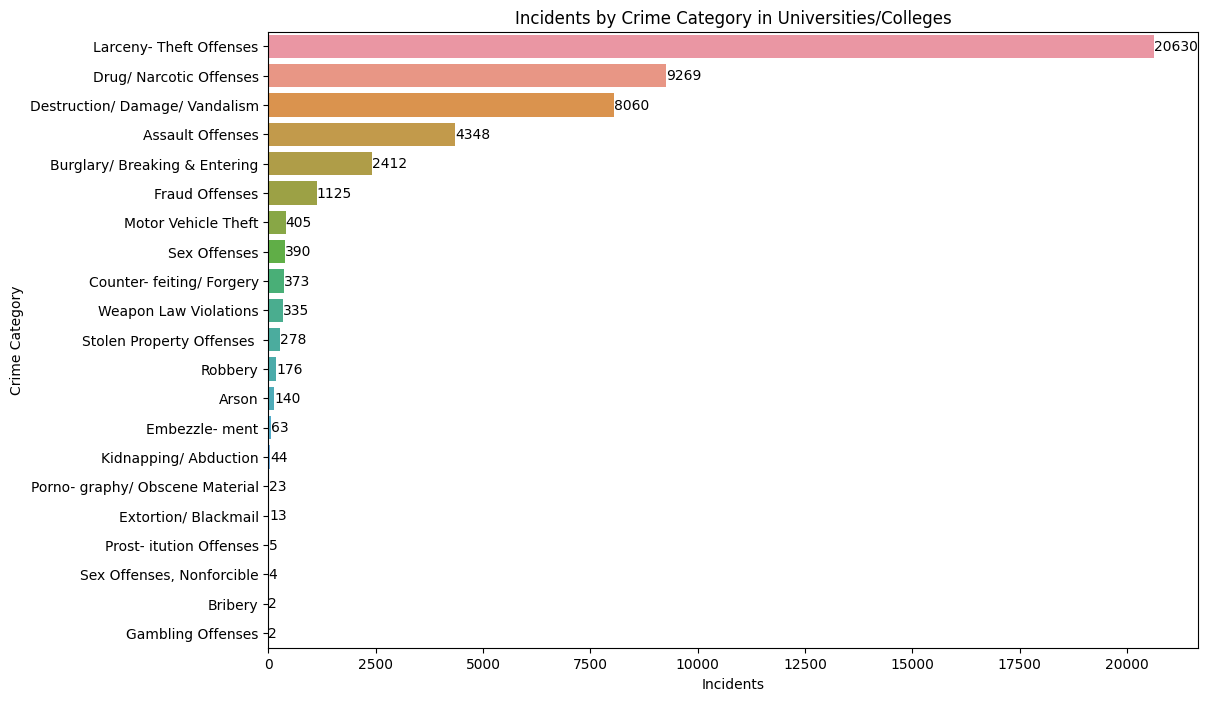

In [39]:
crime_counts_df = crime_counts_df.sort_values(by='Incidents', ascending=False)

plt.figure(figsize=(12,8))
st_plt = sns.barplot(data=crime_counts_df, x='Incidents',y='Crime Category',orient='h')
for bar in st_plt.patches:
    plt.text(
     bar.get_width(),
     bar.get_y() + bar.get_height() / 2,
     f'{int(bar.get_width())}',
     va='center')
    
plt.xlabel('Incidents')
plt.ylabel('Crime Category')
plt.title('Incidents by Crime Category in Universities/Colleges')
plt.grid(False)
plt.show();

The chart illustrates that in the context of universities and colleges, Larceny-Theft Offenses are the most prevalent, followed by Drug/Narcotic and Destruction/Vandalism Offenses. The least common reported incidents involve Gambling and Bribery. This data could inform campus security measures and prevention programs.

### Compare offenses at Michigan State University with offenses at all other universities.

In [40]:
value_to_check = 'MICHIGAN STATE UNIVERSITY'

if value_to_check in df_2['Agency Name'].values:
    print(f"The value '{value_to_check}' exists in the column.")
else:
    print(f"The value '{value_to_check}' does not exist in the column.")

The value 'MICHIGAN STATE UNIVERSITY' exists in the column.


In [41]:
def calculate_total_offenses(row):
    offense_columns = [col for col in df_2.columns if 'Offenses' in col]  # Identify all offense columns
    return row[offense_columns].sum()

In [42]:
df_2['Total Offenses'] = df_2.apply(calculate_total_offenses, axis=1)

msu_offenses = df_2[df_2['Agency Name'].str.contains('MICHIGAN STATE UNIVERSITY', na=False)]['Total Offenses'].sum()

other_universities = df_2[~df_2['Agency Name'].str.contains('MICHIGAN STATE UNIVERSITY', na=False)]
average_offenses_other_unis = other_universities['Total Offenses'].mean()

In [43]:
comparison_df = pd.DataFrame({
    'University': ['Michigan State University', 'Average of Other Universities'],
    'Total Offenses': [msu_offenses, average_offenses_other_unis]
})
comparison_df

,University,Total Offenses
0,Michigan State University,891.000000
1,Average of Other Universities,705.463126


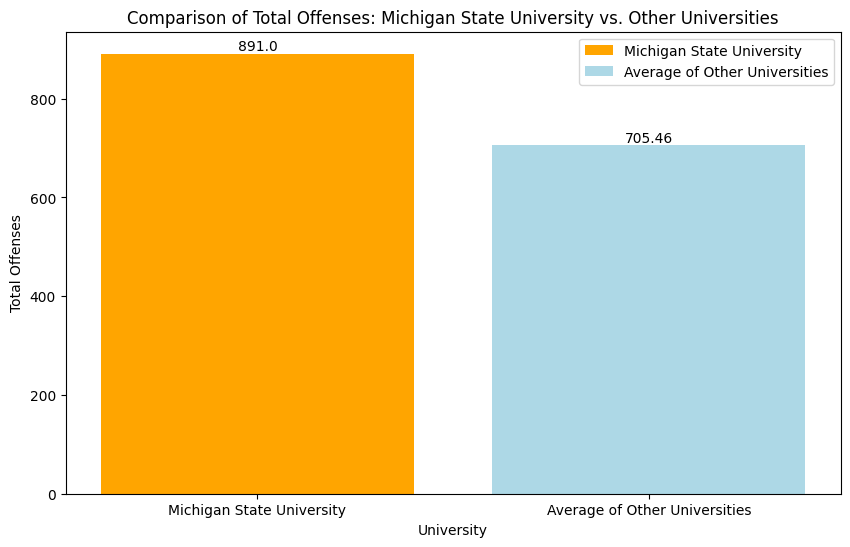

In [46]:
plt.figure(figsize=(10, 6))

bar1 = plt.bar(comparison_df['University'][0], comparison_df['Total Offenses'][0], color='orange', label='Michigan State University')
bar2 = plt.bar(comparison_df['University'][1], comparison_df['Total Offenses'][1], color='lightblue', label='Average of Other Universities')

plt.text(comparison_df['University'][0], comparison_df['Total Offenses'][0], round(comparison_df['Total Offenses'][0], 2), va='bottom', ha='center')
plt.text(comparison_df['University'][1], comparison_df['Total Offenses'][1], round(comparison_df['Total Offenses'][1], 2), va='bottom', ha='center')

plt.xlabel('University')
plt.ylabel('Total Offenses')
plt.title('Comparison of Total Offenses: Michigan State University vs. Other Universities')
plt.legend()
plt.show()

From the above bar charts, we understood that Michigan State University has more reported incidents than the average university. While Michigan State has about 2,673 incidents, the typical university has around 2,116. This means that Michigan State University has a higher number of incidents compared to most other universities.

### Which provinces have state agencies with lowest number of digital offenses registered (Credit Card/Automated Teller Machine Fraud, Wire Fraud)

In [48]:
df_digital_offenses = df_2[["State", 'Credit Card/ Automated Teller Machine Fraud', 'Wire Fraud']].copy()
df_digital_offenses["digital_fraud"] = df_digital_offenses['Credit Card/ Automated Teller Machine Fraud'] + df_digital_offenses['Wire Fraud']

grouped = df_digital_offenses.groupby('State').sum().reset_index()
lowest_digital_fraud = grouped.sort_values('digital_fraud', ascending=True)
lowest_digital_fraud

,State,Credit Card/ Automated Teller Machine Fraud,Wire Fraud,digital_fraud
6,DISTRICT OF COLUMBIA,0.0,0.0,0.0
15,MISSISSIPPI,85.0,4.0,89.0
0,ALABAMA,109.0,0.0,109.0
30,VERMONT,122.0,23.0,145.0
8,ILLINOIS,209.0,0.0,209.0
12,MAINE,245.0,12.0,257.0
1,ARIZONA,260.0,0.0,260.0
17,MONTANA,353.0,2.0,355.0
26,SOUTH DAKOTA,366.0,9.0,375.0
20,NORTH DAKOTA,472.0,44.0,516.0


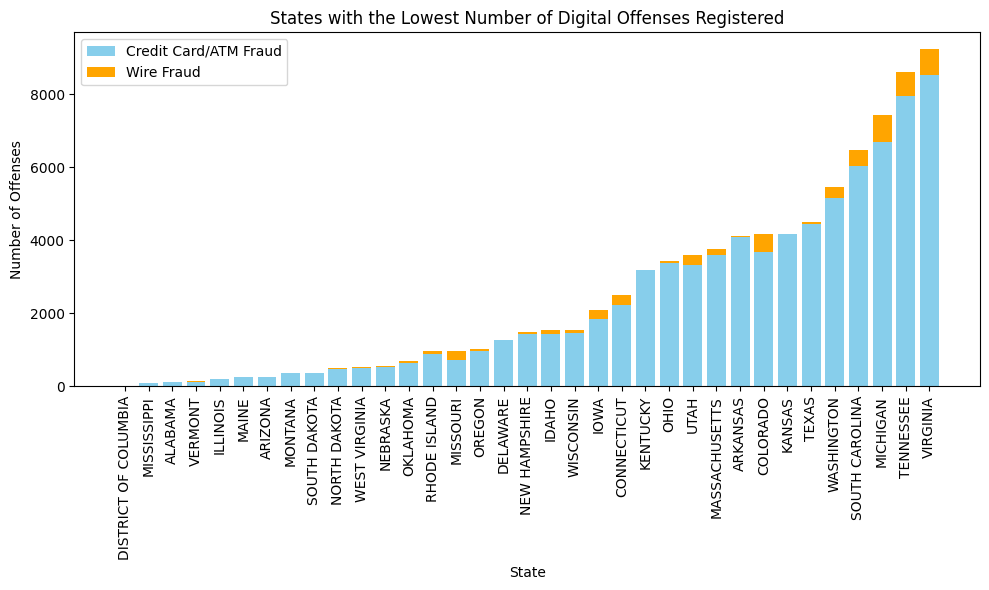

In [49]:
plt.figure(figsize=(10, 6))

credit_card_bars = plt.bar(lowest_digital_fraud['State'], lowest_digital_fraud['Credit Card/ Automated Teller Machine Fraud'], label='Credit Card/ATM Fraud', color='skyblue')
wire_fraud_bars = plt.bar(lowest_digital_fraud['State'], lowest_digital_fraud['Wire Fraud'], bottom=lowest_digital_fraud['Credit Card/ Automated Teller Machine Fraud'], label='Wire Fraud', color='orange')

plt.title('States with the Lowest Number of Digital Offenses Registered')
plt.xlabel('State')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


From the above chart, we can cleary see the States with the Lowest Number of Digital Offenses Registered. We understood that the states such as District of Columbia ,Mississippi and Alabama has the lowest number of digital offenses both in terms of Credit Card/ATM Fraud and Wire Fraud.

Moreover, states like Virginia, Tennessee and Michigan has the highest number of digital frauds.

### Which category of agency type and their respective agency names have the highest number of offenses registered per million people?

In [50]:
offense_columns = [
    'Assault Offenses', 'Homicide Offenses', 'Kidnapping/ Abduction', 'Sex Offenses',
    'Sex Offenses, Nonforcible', 'Arson', 'Bribery', 'Burglary/ Breaking & Entering',
    'Counter- feiting/ Forgery', 'Destruction/ Damage/ Vandalism', 'Embezzle- ment',
    'Extortion/ Blackmail', 'Fraud Offenses', 'Larceny- Theft Offenses',
    'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ', 'Drug/ Narcotic Offenses',
    'Gambling Offenses', 'Porno- graphy/ Obscene Material', 'Prost- itution Offenses',
    'Weapon Law Violations'
]
df_offenses = df_2[offense_columns].copy()
agency_population_data = df_2[["Agency Type", "Agency Name", "Population1"]].copy()

QE = pd.concat([agency_population_data, df_offenses], axis=1)
QE['sum_offenses'] = df_offenses.sum(axis=1)
QE['offenses_per_million'] = QE['sum_offenses'] / (QE['Population1'] / 1_000_000)

In [51]:
grouped1 = QE.groupby(['Agency Type', 'Agency Name']).sum().reset_index()
highest_offenses_per_million = grouped1.sort_values('offenses_per_million', ascending=False)
highest_offenses_per_million

,Agency Type,Agency Name,Population1,Assault Offenses,Homicide Offenses,Kidnapping/ Abduction,Sex Offenses,"Sex Offenses, Nonforcible",Arson,Bribery,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug/ Narcotic Offenses,Gambling Offenses,Porno- graphy/ Obscene Material,Prost- itution Offenses,Weapon Law Violations,sum_offenses,offenses_per_million
1252,CITIES,LAKESIDE,8,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,1.0,53.0,6.625000e+06
2727,METROPOLITAN COUNTIES,FAIRFAX COUNTY POLICE DEPARTMENT,8557,7629.0,15.0,145.0,345.0,7.0,70.0,2.0,...,801.0,344.0,78.0,5027.0,14.0,93.0,85.0,504.0,39717.0,4.641463e+06
2753,METROPOLITAN COUNTIES,GREENVILLE,5913,6032.0,25.0,128.0,424.0,28.0,74.0,0.0,...,918.0,323.0,229.0,2709.0,38.0,9.0,61.0,331.0,26005.0,4.397937e+06
2865,METROPOLITAN COUNTIES,RICHLAND,27019,5030.0,19.0,100.0,308.0,27.0,32.0,1.0,...,1229.0,402.0,110.0,1535.0,4.0,17.0,19.0,236.0,24157.0,3.727371e+06
2771,METROPOLITAN COUNTIES,JACKSON,41034,1376.0,7.0,12.0,76.0,1.0,13.0,0.0,...,117.0,14.0,16.0,567.0,0.0,3.0,0.0,91.0,5524.0,3.440761e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,OTHER AGENCIES,CHESTER COUNTY,5913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3715,OTHER AGENCIES,MINERAL COUNTY,29617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3764,OTHER AGENCIES,REELFOOT LAKE,6733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3584,OTHER AGENCIES,CHARLESTON COUNTY,5913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


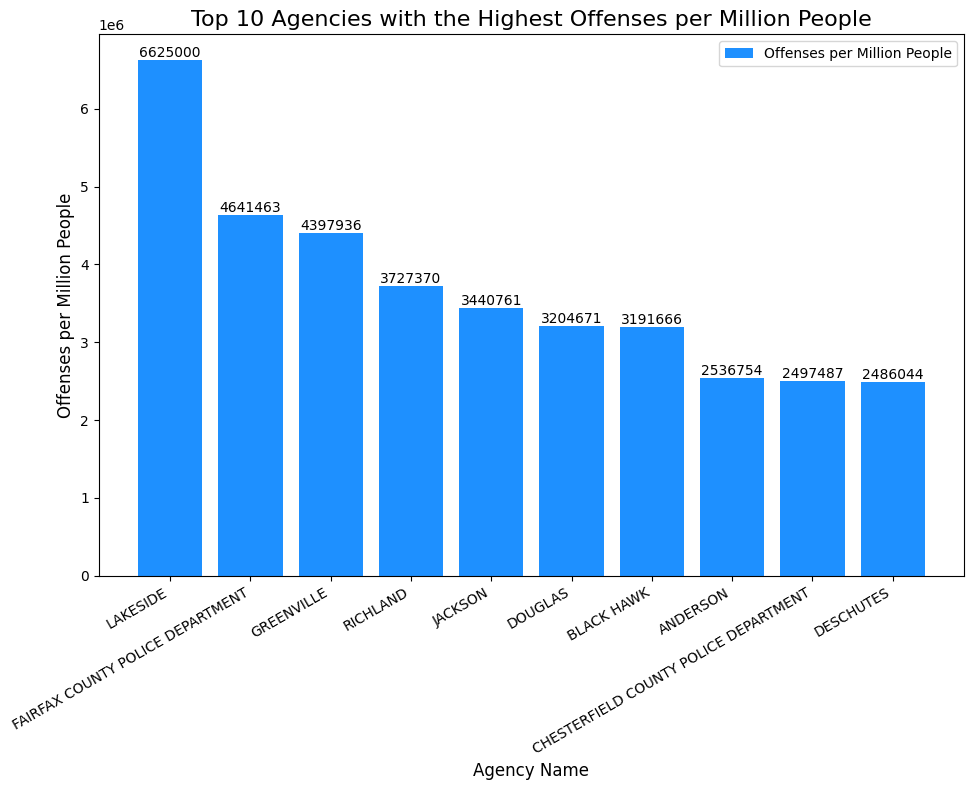

In [54]:
top_agencies = highest_offenses_per_million.head(10)
plt.figure(figsize=(10, 8))

bars = plt.bar(top_agencies['Agency Name'], top_agencies['offenses_per_million'], color='dodgerblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.title('Top 10 Agencies with the Highest Offenses per Million People', fontsize=16)
plt.xlabel('Agency Name', fontsize=12)
plt.ylabel('Offenses per Million People', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(['Offenses per Million People'], loc='upper right')
plt.tight_layout()
plt.show()

From the above chart, we understood a clear ranking of the top 10 agencies by offense rates per million people, highlighting a significant disparity between the top agency and the rest. While Lakeside has the biggest offenses per Miliion People but the big difference in offense rates between the top agency and the others means there might be something unusual happening that needs more investigation.

### Geospatial visualization of the data showing the offence type with highest number of offences in that province (Hint: for each state find the offense type with highest number of offenses and create a geoplot)

In [55]:
offense_columns = [col for col in df_2.columns if col not in ['State', 'Agency Type', 'Agency Name', 'Population1', 'Unnamed: 0']]

offenses_df = df_2[offense_columns].apply(pd.to_numeric, errors='coerce')
offenses_df['State'] = df_2['State']

state_offenses = offenses_df.groupby('State').sum()
highest_offense_type = state_offenses.idxmax(axis=1).reset_index()
highest_offense_type.columns = ['State', 'Highest Offense Type']
highest_offense_count = state_offenses.max(axis=1).reset_index()
highest_offense_count.columns = ['State', 'Highest Offense Count']
highest_offense_type['Highest Offense Type'] = highest_offense_type['Highest Offense Type'] + ' (' + highest_offense_count['Highest Offense Count'].astype(str) + ')'

state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

highest_offense_type['State Code'] = highest_offense_type['State'].map(state_abbreviations)
highest_offense_type['State'] = highest_offense_type['State'].str.upper()
state_abbreviations_upper = {state.upper(): code for state, code in state_abbreviations.items()}
highest_offense_type['State Code'] = highest_offense_type['State'].map(state_abbreviations_upper)

print(highest_offense_type[['State', 'State Code', 'Highest Offense Type']])
print(highest_offense_type.isna().sum())

                   State State Code       Highest Offense Type
0                ALABAMA         AL    Total Offenses (3341.0)
1                ARIZONA         AZ   Total Offenses (10309.0)
2               ARKANSAS         AR  Total Offenses (160762.0)
3               COLORADO         CO  Total Offenses (194555.0)
4            CONNECTICUT         CT   Total Offenses (79898.0)
5               DELAWARE         DE   Total Offenses (61599.0)
6   DISTRICT OF COLUMBIA        NaN    Total Offenses (2311.0)
7                  IDAHO         ID   Total Offenses (59250.0)
8               ILLINOIS         IL   Total Offenses (12920.0)
9                   IOWA         IA   Total Offenses (99311.0)
10                KANSAS         KS  Total Offenses (117601.0)
11              KENTUCKY         KY  Total Offenses (122365.0)
12                 MAINE         ME   Total Offenses (13802.0)
13         MASSACHUSETTS         MA  Total Offenses (179391.0)
14              MICHIGAN         MI  Total Offenses (35

In [56]:
fig = px.choropleth(
    highest_offense_type,
    locations='State Code',
    locationmode='USA-states',
    color='Highest Offense Type',
    hover_name='State',
    hover_data=['Highest Offense Type'],
    scope="usa",
    title='Highest Offense Type by State (Count)',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))
fig.show()

The plot illustrates a geospatial view within the United States, highlighting states based on their highest offense rates.

Refer file *"Data Modeling.ipynb"* to delve into the *"Data Modeling"* concept (Content 6 and beyond).